# Desafío - Máquinas de Soporte Vectorial

* Integrantes: 
    * Hugo Contreras
    * Esteban Ramírez
    * Rodrigo Campos
    * César Flores

### Ejercicio 1: Preparar el ambiente de trabajo

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(15, 30)

In [2]:
df = pd.read_csv('breast_cancer.csv').drop(columns = ['id','Unnamed: 32'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
df['diagnosis_recod'] = np.where(df['diagnosis'] == 'M',1,-1)

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_recod
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


__Dado que la clase diagnóstico M era minoritaria, la clase recodificada 'diagnosis_recod' será uno cuando la clase sea 'M' y  -1 cuando la clase sea 'B'__

### Ejercicio 2: Visualizando la distribución de los atributos

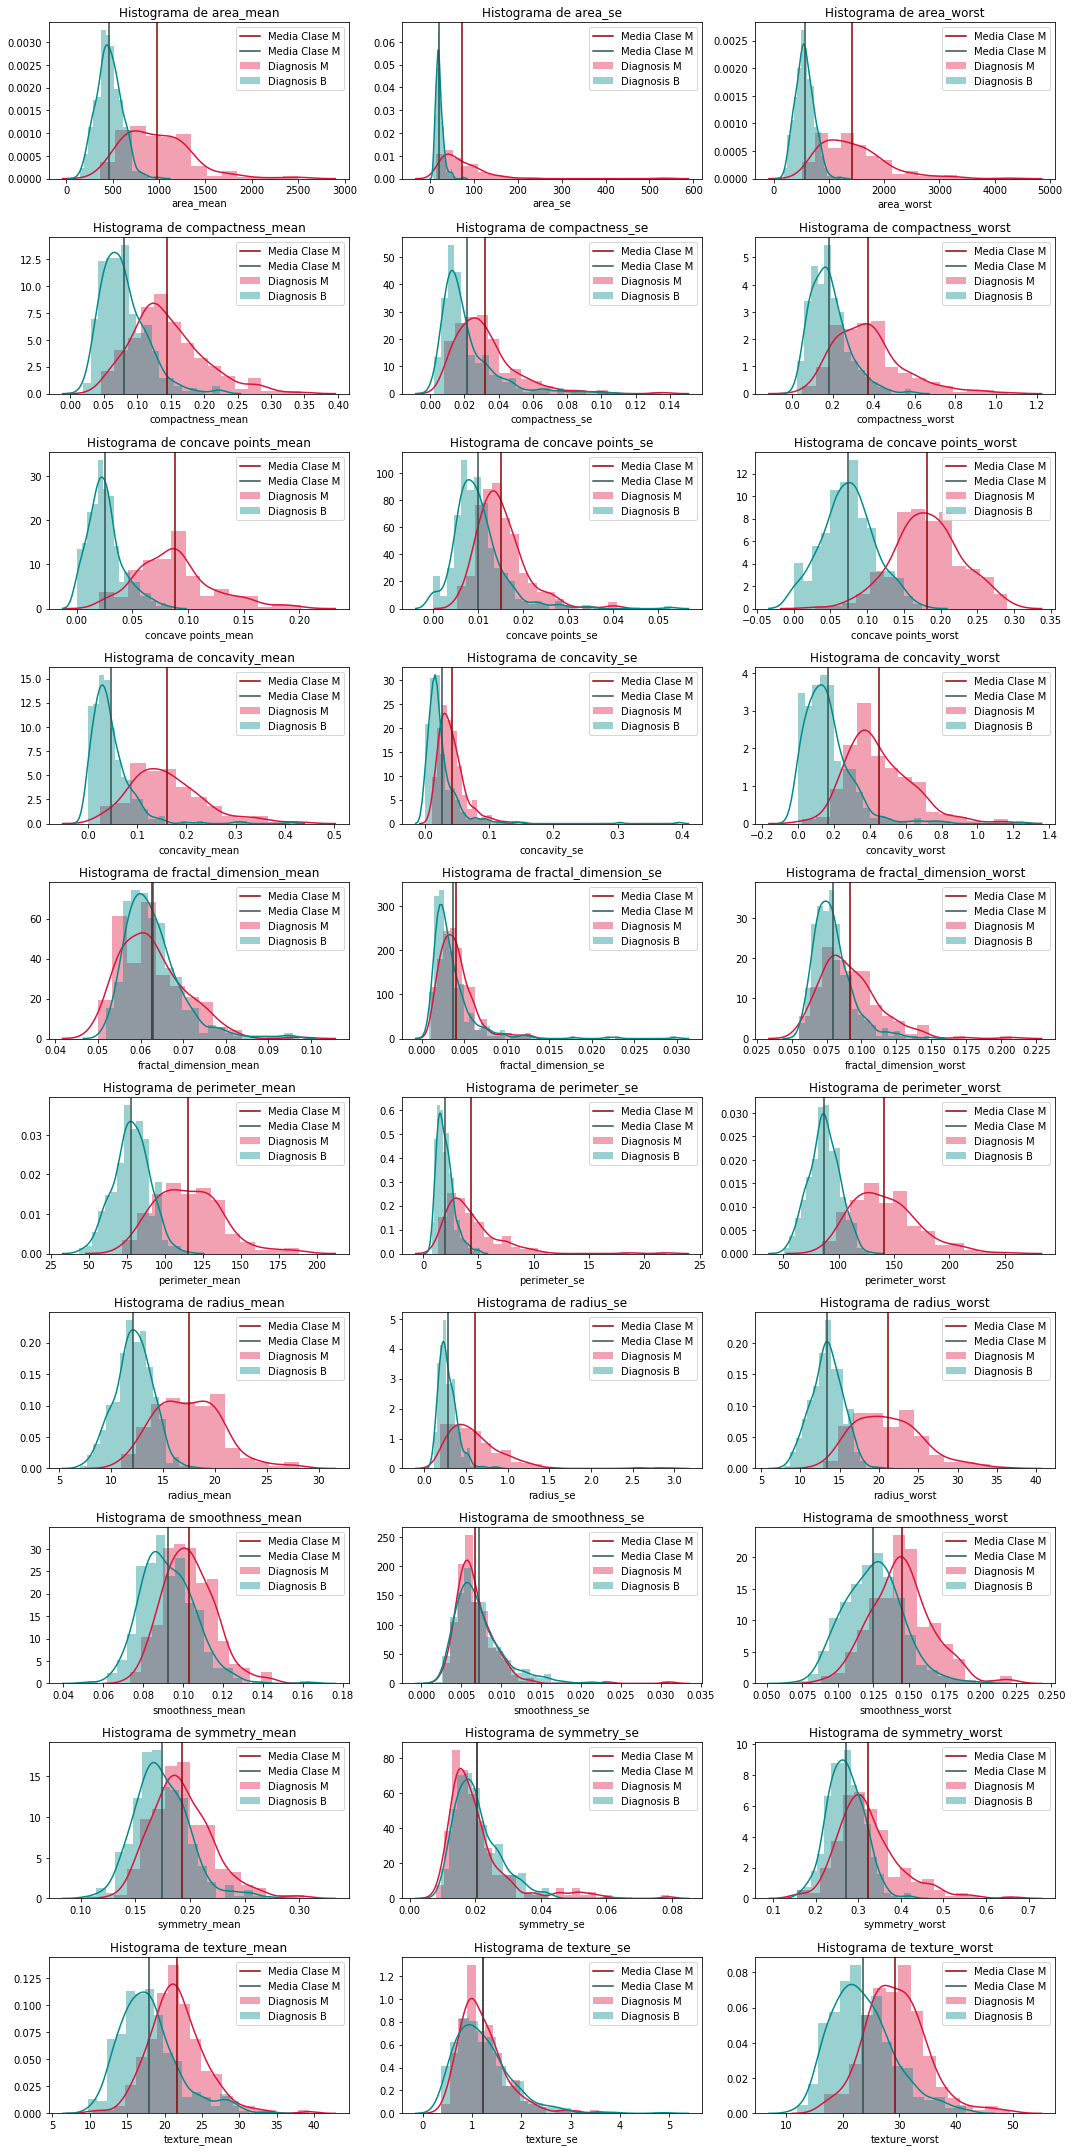

In [8]:
cont = 1
for i in df[df.columns.difference(['diagnosis','diagnosis_recod'])].columns:
    if df[i].dtype !='O':
        plt.subplot(10,3,cont)
        sns.distplot(df[df['diagnosis_recod'] == 1][i], color = 'crimson', label = 'Diagnosis M')
        sns.distplot(df[df['diagnosis_recod'] == -1][i], color = 'darkcyan', label = 'Diagnosis B')
        plt.axvline(df[df['diagnosis_recod'] == 1][i].mean(), color = 'darkred', label = 'Media Clase M')
        plt.axvline(df[df['diagnosis_recod'] == -1][i].mean(), color = 'darkslategrey', label = 'Media Clase M')
        plt.tight_layout()
    elif df[i].dtype == 'O':
        plt.subplot(10,3,cont)
        plt.hist(df[i])
    plt.title('Histograma de {}'.format(i))
    plt.tight_layout()
    plt.legend()
    cont += 1
plt.show()

* Como se observa en los gráficos de distribución de cada uno de los atributos presentes en los datos, la distribución varía en muchos de los casos dependiendo de la clase '1' o '-1'.

* En el siguiente ejercicio, se presenta un afunción para estimar el grado de comunalidad de las clases, es decir, que tan solapadas se encuentran las distribuciones de cada clase.

__Comentarios__

### Ejercicio 3: Estimando el porcentaje de overlap en los atributos

In [9]:
def histogram_overlap(df, attribute, target, perc=100):
    # get lower bound
    empirical_lower_bound = np.floor(df[attribute].min())
    # get upper bound
    empirical_upper_bound = np.ceil(df[attribute].max())
    # preserve histograms
    tmp_hist_holder = dict()
    # for each target class
    for unique_value in np.unique(df[target]):
        # get histogram
        tmp, _ = np.histogram(
        # for a specific attribute
        df[df[target] == unique_value][attribute],
        # define percentage
        bins=perc,
        # limit empirical range for comparison
        range=[empirical_lower_bound, empirical_upper_bound]
        )
        # append to dict
        tmp_hist_holder["h_"+str(unique_value)] = tmp
        ##print( tmp_hist_holder)
    get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_-1"])
    intersection = np.true_divide(np.sum(get_minima), np.sum(tmp_hist_holder["h_-1"]))
    return intersection

In [10]:
atributo = []
insersection = []

In [11]:
for i in df[df.columns.difference(['diagnosis','diagnosis_recod'])].columns:
    atributo.append(i)
    insersection.append(histogram_overlap(df,i,'diagnosis_recod'))

In [12]:
dic = {'Atributo':atributo,'Intersection':insersection}
df_param = pd.DataFrame(dic)
df_param.sort_values(by = 'Intersection', ascending = False)

,Atributo,Intersection
13,fractal_dimension_se,0.593838
22,smoothness_se,0.591036
12,fractal_dimension_mean,0.588235
25,symmetry_se,0.568627
28,texture_se,0.549020
4,compactness_se,0.523810
21,smoothness_mean,0.521008
24,symmetry_mean,0.509804
7,concave points_se,0.507003
14,fractal_dimension_worst,0.492997


### Ejercicio 4: Selección del modelo por GridSearchCV

In [13]:
x_scaled = StandardScaler().fit_transform(df.loc[:,'radius_mean':'fractal_dimension_worst'])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,'radius_mean':'fractal_dimension_worst'], df['diagnosis_recod'], random_state=18417,test_size=.33)

In [15]:
modelo = SVC(kernel='rbf')

In [22]:
c_param =  [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma_param = [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
dic = {'C':c_param, 'gamma':gamma_param}

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
grid = GridSearchCV(modelo,param_grid = dic,cv = 10, n_jobs = -1)

In [25]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
test_score = grid.cv_results_['mean_test_score']
results = test_score.reshape(7,8)

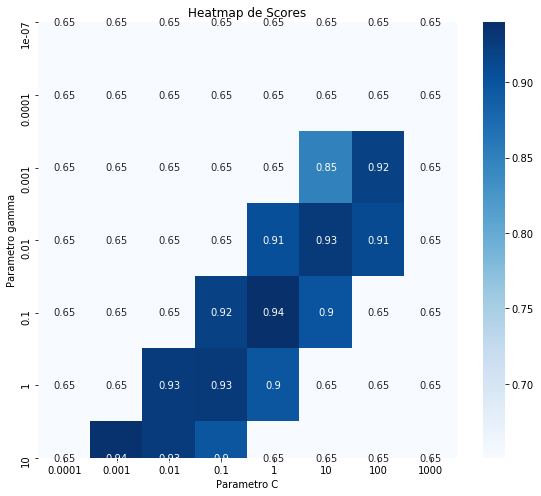

In [45]:
plt.figure(figsize = (8,7))
sns.heatmap(results, xticklabels = c_param, yticklabels = gamma_param,annot=True, cmap='Blues')
plt.title('Heatmap de Scores')
plt.xlabel('Parametro C')
plt.ylabel('Parametro gamma')
plt.tight_layout()
plt.show()

* Como se observa en el mapa de calor, la media de los puntajes de las 10 validaciones cruzadas aumenta mientras mayor sea el valor del parametro C y mientras auemnta el valor del parámetro gamma.

__Best Estimator__

In [31]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

__Best Score__

In [46]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

* Como se puede observar la mejor combinacion de paramteros es C= 10 y gamma = 0.0001, ya que con esta se obtiene el mejor modelo de SVM para estos datos.

### Ejercicio 5: Validación del modelo en el hold-out sample

In [47]:
modelo = SVC(kernel='rbf', C = 10, gamma = 0.0001 )

In [48]:
modelo.fit(x_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
prediccion = modelo.predict(x_test)

__Matriz de Confusion__

In [52]:
confusion_matrix(y_test,prediccion)

array([[107,   2],
       [  9,  70]], dtype=int64)

* Como se puede observar en la matriz de Confusión, el modelo tiene un alto despempeño prediciendo tanto la clase 1 como la clase -1, en el reporte de clasificación esto es más evidente ya que el Recall como el Precission son superiores al 90%, lo que evidentemente es un muy buen modelo.

__Reporte de Clasificacion__

In [54]:
print(classification_report(y_test,prediccion))

              precision    recall  f1-score   support

          -1       0.92      0.98      0.95       109
           1       0.97      0.89      0.93        79

    accuracy                           0.94       188
   macro avg       0.95      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188



__El modelo presenta un desempeño productivo deficiente cuando :__ aun no se presenta bajo desempeño para ningún caso

### Ejercicio (opcional): Depuración de atributos